<a href="https://colab.research.google.com/github/NaithaniAR/Copy_of_Self_Project_Gradient_Descent.ipynb/blob/main/Copy_of_Self_Project_Gradient_Descent.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Gradient Descent for Optimization

In [24]:
# Matrix computations
from numpy import *

# Plotting
from matplotlib.pyplot import * 
import numpy as np
import matplotlib.pyplot as plt

# Change size of figures
fig_size = [9,7]
rcParams["figure.figsize"] = fig_size

## Minimizing multiple variable function

Let us consider the following straight forward bivariate function $$f(x,y) = x^2 + y^2 + 1.$$ Since this a function of two variables, we have have the following partial derivatives $$\frac{df(x)}{dx} = f_{x} = 2x \text{ and } \frac{df(y)}{dy} = f_{y} = 2y.$$ Note that its easy to argue that the global minimum of $f(x,y)$ is (0,0) since $f(0,0) = 1$ and $f(x,y) \ge 1.$


In [47]:
# Plotting in 3D
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from matplotlib.ticker import LinearLocator, FormatStrFormatter

# f(x,y,xdot,ydot) = x^2 + y^2 + 1
def f(x,y):
    return x**2 + y**2 + 1

# (X,Y) grid on [-5,5]
x = arange(-5, 5, 0.25)
y = arange(-5, 5, 0.25)
X, Y = meshgrid(x, y)


# z = x^2 + y^2
Z = f(X,Y)
Z=f(xdot,ydot)

# Plot (X,Y) in 3D
fig = figure(1)
ax = fig.gca(projection='3d')
surf = ax.plot_surface(X, Y, Z, rstride=1, cstride=1, cmap=cm.RdBu,linewidth=0, antialiased=False)

ax.zaxis.set_major_locator(LinearLocator(10))
ax.zaxis.set_major_formatter(FormatStrFormatter('%.02f'))
fig.colorbar(surf, shrink = 0.7, aspect=5)

#plot(xdots)
#plot(ydots)




show()    

NameError: ignored

### Finding global minimum using gradient descent

For this example the gradient descent algorithm is simplified to

$$
\begin{bmatrix}
    x^{t+1} \\ 
    y^{t+1}
\end{bmatrix}
=
\begin{bmatrix}
    x^{t} \\ 
    y^{t}
\end{bmatrix}
-
\lambda
\begin{bmatrix}
    2x^{t} \\ 
    2y^{t} \\ 
\end{bmatrix},
$$

where $t$ is the gradient descent iteration. 

In [8]:
# Derivative of f(x) is f'(x) (denoted by df below)
# f'(x) = 0.2x + 0.2xcos(0.1x^2)
def derivative(x):
  return 0.2*x + 0.2*x*cos(0.1*x**2)

In [10]:
# Your code here

def gradient_descent(x,y):
    m_curr = b_curr = 0
    rate = 0.01
    n = len(x)
    plt.scatter(x,y,color='red',marker='+',linewidth='5')
    for i in range(10000):
        y_predicted = m_curr * x + b_curr
#         print (m_curr,b_curr, i)
        plt.plot(x,y_predicted,color='green')
        md = -(2/n)*sum(x*(y-y_predicted))
        yd = -(2/n)*sum(y-y_predicted)
        m_curr = m_curr - rate * md
        b_curr = b_curr - rate * yd

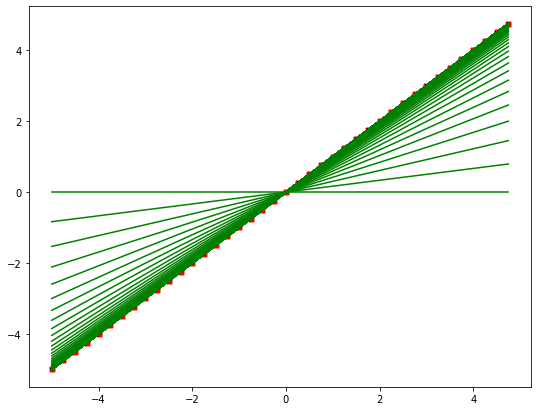

In [14]:
gradient_descent(x,y)


In [32]:
 # Gradient Descent 
def grad_descent(x_prev,y_prev,learning_rate):
 
 # Deciding when to stop the algorithm
  epsilon = 0.001

  def derivative(x,y):
   return np.array((2*x,2*y))

  # Iteration number
  grad_iter = 1

  # Gradient descent update step
  
  variables_prev = np.array( (x_prev,y_prev ))
  variables_next = variables_prev - learning_rate*derivative(variables_prev[0],variables_prev[1])

  # Update the sequence where we store all the x_next
  xsequence, ysequence = np.array((x_prev,y_prev))
  xsequence, ysequence = np.append(xsequence,variables_next[0]),np.append(ysequence,variables_next[1])

  # Start my iteration 
  while abs(np.sqrt(np.sum((variables_next-variables_prev)**2))) > epsilon :

    # Setting x_prev to x_next
    variables_prev = variables_next

    # Updating x_next 
    variables_next = variables_prev - learning_rate*derivative(variables_prev[0],variables_prev[1])

    # Update sequence
    xsequence, ysequence = np.append(xsequence,variables_next[0]),np.append(ysequence,variables_next[1])

    # Update iteration
    grad_iter = grad_iter + 1


  return variables_next,xsequence,ysequence,grad_iter

In [49]:
grad_output =grad_descent(5,5,0.1)
f(grad_output[1],grad_output[2])

array([51.        , 33.        , 21.48      , 14.1072    ,  9.388608  ,
        6.36870912,  4.43597384,  3.19902326,  2.40737488,  1.90071993,
        1.57646075,  1.36893488,  1.23611832,  1.15111573,  1.09671407,
        1.061897  ,  1.03961408,  1.02535301,  1.01622593,  1.01038459,
        1.00664614,  1.00425353,  1.00272226,  1.00174225,  1.00111504,
        1.00071362,  1.00045672,  1.0002923 ,  1.00018707,  1.00011973,
        1.00007662,  1.00004904,  1.00003139,  1.00002009,  1.00001286])